In [73]:
import pandas as pd 
import numpy as np
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
train_dir='../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train'
tot_train=len(os.listdir(train_dir))
test_dir='../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test'
tot_test=len(os.listdir(test_dir))



# VISUALIZATION OF DEFECT AND CORRECT ONES

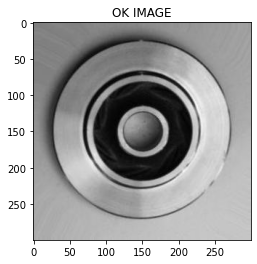

In [75]:
image=cv2.imread('../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/ok_front/cast_ok_0_1092.jpeg')
plt.title("OK IMAGE")
plt.imshow(image)

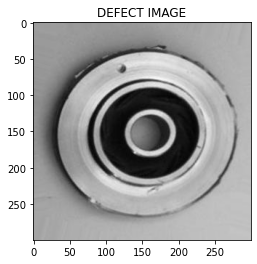

In [76]:
image=cv2.imread("../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/def_front/cast_def_0_1007.jpeg")
plt.title("DEFECT IMAGE")
plt.imshow(image)



In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1.0/255.0)
                           
                           
validation_gen=ImageDataGenerator(rescale=1.0/255.0)

In [79]:
trainDatagen=train_gen.flow_from_directory(train_dir,
                                          target_size=(300,300),
                                           batch_size=100,
                                           class_mode='binary')
valDatagen=validation_gen.flow_from_directory(test_dir,
                                              target_size=(300,300),
                                           batch_size=64,
                                           class_mode='binary')


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [80]:
def create_model(input_shape):
   
    base_model = tf.keras.applications.Xception(input_shape = input_shape,
                       include_top = False)
                      

    # we do not have to train all of the layers
    for layer in base_model.layers:
        layer.trainable = False
        
    x = tf.keras.layers.Flatten()(base_model.output)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
    
    return tf.keras.models.Model(base_model.input,x)
model = create_model((300,300,3))
model.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_9[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________

In [81]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [84]:
class mycallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if(logs.get('accuracy')>=1.0):
            self.model.stop_training=True

In [85]:
callbacks=mycallbacks()
history=model.fit_generator(trainDatagen,validation_data=valDatagen,epochs=20,verbose=1,callbacks=[callbacks])

Epoch 1/20
67/67 [==============================] - 38s 573ms/step - loss: 0.0157 - accuracy: 0.9959 - val_loss: 0.0248 - val_accuracy: 0.9958
Epoch 2/20
67/67 [==============================] - 38s 573ms/step - loss: 0.0144 - accuracy: 0.9947 - val_loss: 0.0259 - val_accuracy: 0.9958
Epoch 3/20
67/67 [==============================] - 37s 559ms/step - loss: 0.0136 - accuracy: 0.9950 - val_loss: 0.0386 - val_accuracy: 0.9916
Epoch 4/20
67/67 [==============================] - 37s 550ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0308 - val_accuracy: 0.9832
Epoch 5/20
67/67 [==============================] - 38s 560ms/step - loss: 0.0097 - accuracy: 0.9962 - val_loss: 0.0327 - val_accuracy: 0.9902
Epoch 6/20
67/67 [==============================] - 37s 556ms/step - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0264 - val_accuracy: 0.9944
Epoch 7/20
67/67 [==============================] - 36s 541ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0255 - val_accuracy: 0.9944

In [86]:
trainDatagen.class_indices

{'def_front': 0, 'ok_front': 1}

In [87]:
pred_probability = model.predict_generator(valDatagen)
valDatagen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
from sklearn.metrics import classification_report
predictions = pred_probability > 0.5
print(classification_report(valDatagen.classes,predictions))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       453
           1       0.35      0.35      0.35       262

    accuracy                           0.52       715
   macro avg       0.48      0.48      0.48       715
weighted avg       0.52      0.52      0.52       715



In [96]:
def prediction(image):
    img=cv2.imread(image)
    img=img/255
    pred = model.predict(img.reshape(-1,300,300,3))
    if (pred<0.5):
        print("def_front")
        cv2.putText(img, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    else:
        print("ok_front")
        cv2.putText(img, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.show()

def_front


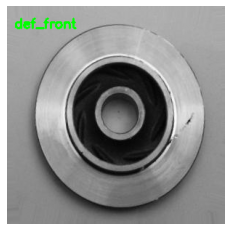

In [97]:
prediction('../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test/def_front/cast_def_0_1153.jpeg')